In [72]:
import requests
from bs4 import BeautifulSoup
import bs4
from IPython.display import Image

In [68]:
def add_pic(pic_name ):
    return (Image(filename='/Users/paxton615/Github_Personal/Notes/Notes/pics/uni_ranking/'+pic_name))

In [25]:
! ls /Users/paxton615/Github_Personal/Notes/Notes/pics/

bs4                           requests
html                          sklearn_algorithm_cheat_sheet
linear_algebra                uni_ranking
normal_distribution


### 爬取前需要检查

1.需要确认被提取信息是否存在于html脚本中中，因为有些内容是写在Javascript中的，这种情况下，被提取信息是动态生成的,requests无法提取。

2.是否支持Robost协议http://www.zuihaodaxue.cn/zuihaodaxuepaiming2019.html/robots.txt

### 爬虫设计思路

1. 从网络上获取大学排名内容

2. 提取网页内容中信息到合适的数据结构

3. 利用数据结构展示并输出结果

### 程序的结构设计

先定义3个基本函数

1. 从网络上获取大学排名网页内容 getHTMLText()

2. 提取网页内容中信息到合适的数据结构 fillUnivList()

3. 利用数据结构展示并输出结果 printUnivList()

再定义一个主函数 def main():

In [26]:
r = requests.get('http://www.zuihaodaxue.cn/zuihaodaxuepaiming2019.html')
r.status_code

200

In [60]:
def getHTMLText(url): # 获取url信息，输出html页面给下一个函数，requests的工作
    try:
        r = requests.get(url, timeout = 30) # 传入网址,30s相应时间
        r.raise_for_status()  # 回馈相应情况
        r.encoding = r.apparent_encoding  # 设定解码准则
        return r.text  # 返回html文本
    except:
        return ''  # 否则返回空str

In [103]:
def fillUnivList(ulist, html): #将html页面放到一个list中，bs4的工作,核心工作
    #pass    # pass不做任何操作
    ulist = []
    for tr in soup.find('tbody').children:  # 关系大到小：tbody > tr > td 
        #print(tr) #测试成功，可以找到tr信息，每一个tr就是一所大学所对应的信息
        #课程内容：实际标签构建中，它的儿子标签中可能出现str，但是这里的信息都是封装在tr标签中，它是标签类型，
        #接上，因此这里我们需要过滤掉非标签类型的其他信息，需用isinstance()做个判断

        if isinstance(tr, bs4.element.Tag):  # 检测tr标签的类型，如果其不属于bs4.element.Tag类型，将被过滤掉
        # 接上，做这个判断需要import 纯bs4库，添加 import bs4

            tds = tr('td') # 如上部成功，则需要继续查询td标签
            #print(tds) #测试成功，可以找到td信息

            ulist.append([tds[0].string, tds[1].string, tds[2].string, tds[3].string]) #测试成功，549所学校信息

    return (ulist)

In [109]:
def printUnivList(ulist, num): # 将list中的信息打印出来，num表示，进行格式化输出.format()
    # 你想把多少个元素打印出来
    print('{:^10}\t{:^10}\t{:^10}\t{:^10}'.format('排名','校名', '省份','总分'))
    
    for i in range(num):
        u=ulist[i]
        print('{:^10}\t{:^10}\t{:^10}\t{:^10}'.format(u[0],u[1],u[2],u[3]))
        

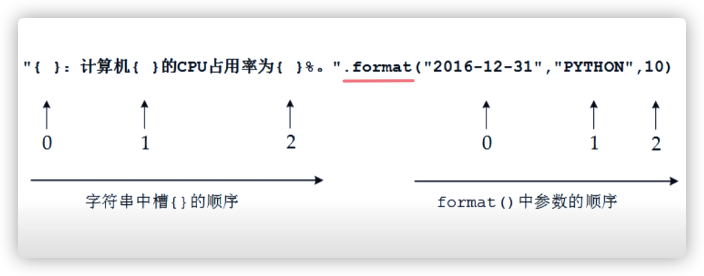

In [110]:
add_pic('format_function.png')

In [111]:
def main():
    unifo = [] #将大学信息放到一个列表中
    url = 'http://www.zuihaodaxue.cn/zuihaodaxuepaiming2019.html'
    html = getHTMLText(url)
    fillUnivList(ulist, html)
    printUnivList(ulist, 20) # 打印前20的学校信息
main()


    排名    	    校名    	    省份    	    总分    
    1     	   清华大学   	    北京    	   94.6   
    2     	   北京大学   	    北京    	   76.5   
    3     	   浙江大学   	    浙江    	   72.9   
    4     	  上海交通大学  	    上海    	   72.1   
    5     	   复旦大学   	    上海    	   65.6   
    6     	 中国科学技术大学 	    安徽    	   60.9   
    7     	  华中科技大学  	    湖北    	   58.9   
    7     	   南京大学   	    江苏    	   58.9   
    9     	   中山大学   	    广东    	   58.2   
    10    	 哈尔滨工业大学  	   黑龙江    	   56.7   
    11    	 北京航空航天大学 	    北京    	   56.3   
    12    	   武汉大学   	    湖北    	   56.2   
    13    	   同济大学   	    上海    	   55.7   
    14    	  西安交通大学  	    陕西    	   55.0   
    15    	   四川大学   	    四川    	   54.4   
    16    	  北京理工大学  	    北京    	   54.0   
    17    	   东南大学   	    江苏    	   53.6   
    18    	   南开大学   	    天津    	   52.8   
    19    	   天津大学   	    天津    	   52.3   
    20    	  华南理工大学  	    广东    	   52.0   


##### 以上，函数中套函数，这是我第一次这么使用。

In [62]:
# 测试getHTMLText, 成功
# getHTMLText('http://www.zuihaodaxue.cn/zuihaodaxuepaiming2019.html')

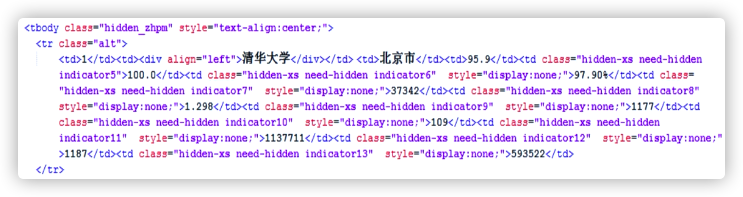

In [69]:
add_pic('html1.png')

In [64]:
soup = BeautifulSoup(r.text , 'html.parser')

In [108]:
ulist = []
for tr in soup.find('tbody').children:  # 关系大到小：tbody > tr > td 
    #print(tr) #测试成功，可以找到tr信息，每一个tr就是一所大学所对应的信息
    #课程内容：实际标签构建中，它的儿子标签中可能出现str，但是这里的信息都是封装在tr标签中，它是标签类型，
    #接上，因此这里我们需要过滤掉非标签类型的其他信息，需用isinstance()做个判断
    
    if isinstance(tr, bs4.element.Tag):  # 检测tr标签的类型，如果其不属于bs4.element.Tag类型，将被过滤掉
    # 接上，做这个判断需要import 纯bs4库，添加 import bs4
    
        tds = tr('td') # 如上部成功，则需要继续查询td标签
        #print(tds) #测试成功，可以找到td信息
        
        ulist.append([tds[0].string, tds[1].string, tds[2].string, tds[3].string , tds[4].string]) #测试成功，549所学校信息
    
print(ulist)
        

[['1', '清华大学', '北京', '94.6', '100.0'], ['2', '北京大学', '北京', '76.5', '95.2'], ['3', '浙江大学', '浙江', '72.9', '84.2'], ['4', '上海交通大学', '上海', '72.1', '91.1'], ['5', '复旦大学', '上海', '65.6', '91.6'], ['6', '中国科学技术大学', '安徽', '60.9', '91.1'], ['7', '华中科技大学', '湖北', '58.9', '80.1'], ['7', '南京大学', '江苏', '58.9', '86.2'], ['9', '中山大学', '广东', '58.2', '79.7'], ['10', '哈尔滨工业大学', '黑龙江', '56.7', '76.6'], ['11', '北京航空航天大学', '北京', '56.3', '86.9'], ['12', '武汉大学', '湖北', '56.2', '82.4'], ['13', '同济大学', '上海', '55.7', '85.2'], ['14', '西安交通大学', '陕西', '55.0', '82.0'], ['15', '四川大学', '四川', '54.4', '74.0'], ['16', '北京理工大学', '北京', '54.0', '79.7'], ['17', '东南大学', '江苏', '53.6', '79.4'], ['18', '南开大学', '天津', '52.8', '83.9'], ['19', '天津大学', '天津', '52.3', '80.1'], ['20', '华南理工大学', '广东', '52.0', '73.4'], ['21', '中南大学', '湖南', '50.3', '73.2'], ['22', '北京师范大学', '北京', '49.7', '82.7'], ['23', '山东大学', '山东', '49.1', '71.3'], ['23', '厦门大学', '福建', '49.1', '75.3'], ['25', '吉林大学', '吉林', '48.9', '71.9'], ['26', '大连理工大学', '辽宁', '48.6', '7